# Mengelompokkan Dataset

In [1]:
import os
import shutil
import pandas as pd

# Path dataset
csv_file_path = 'D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/TrainingLabels.csv'
image_folder = 'D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/5 kelas'

# Load CSV file
df = pd.read_csv(csv_file_path)

# Tampilkan beberapa baris pertama untuk memeriksa data
print(df.head())

       Image  Retinopathygrade  Risk of macular edema   Unnamed: 3  \
0  IDRiD_118                 0                       0         NaN   
1  IDRiD_138                 0                       0         NaN   
2  IDRiD_139                 0                       0         NaN   
3  IDRiD_140                 0                       0         NaN   
4  IDRiD_141                 0                       0         NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0           1         NaN         NaN         NaN         NaN         NaN   
1           2         NaN         NaN         NaN         NaN         NaN   
2           3         NaN         NaN         NaN         NaN         NaN   
3           4         NaN         NaN         NaN         NaN         NaN   
4           5         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 10 Unnamed: 11  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  


In [2]:
# Folder baru untuk menyimpan hasil klasifikasi
output_folder = 'D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi'

# Loop through each row in the dataframe
for index, row in df.iterrows():
    image_name = row['Image'] + '.jpg'  # Sesuaikan jika extensi gambar berbeda
    label = str(row['Retinopathygrade'])  # Mengubah kelas menjadi string
    
    # Buat folder tujuan untuk setiap kelas jika belum ada
    class_folder = os.path.join(output_folder, label)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
    
    # Path gambar asli
    src_image_path = os.path.join(image_folder, image_name)
    
    # Path tujuan folder kelas di folder baru
    dst_image_path = os.path.join(class_folder, image_name)
    
    # Salin gambar ke folder kelas baru tanpa menghapus file asli
    if os.path.exists(src_image_path):
        shutil.copy(src_image_path, dst_image_path)
    else:
        print(f'Image {image_name} not found!')

# Augmentasi

In [3]:
import os
import random
from PIL import Image, ImageEnhance
import numpy as np

# Path ke folder input
input_folder = "D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi/0"

# Fungsi untuk melakukan shift horizontal dan vertikal
def shift_image(img, direction='horizontal', shift_factor=0.2):
    np_img = np.array(img)
    shift_pixels = int(shift_factor * np_img.shape[1 if direction == 'horizontal' else 0])

    if direction == 'horizontal':
        shifted_img = np.roll(np_img, shift_pixels, axis=1)
    else:
        shifted_img = np.roll(np_img, shift_pixels, axis=0)
    
    return Image.fromarray(shifted_img)

# Fungsi untuk melakukan augmentasi dan menyimpan hasil
def augment_image(image_path, num_augmentations):
    img = Image.open(image_path)
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # List metode augmentasi tanpa flip dan shift, yang akan ditambahkan secara terpisah
    augmentations = [
        lambda img: img.rotate(random.uniform(0, 45), expand=True),              # Rotasi acak antara 0-45 derajat
        lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(1.0, 1.5)) # Adjust Brightness
    ]

    # Flag untuk memastikan flip dan shift hanya diterapkan sekali
    flip_applied = False
    shift_applied = False

    for i in range(num_augmentations):
        augmented_img = img

        # Jika flip belum diterapkan, lakukan flip
        if not flip_applied:
            flip_method = random.choice([
                lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),  # Horizontal Flop (mirroring)
                lambda img: img.transpose(Image.FLIP_TOP_BOTTOM)   # Vertical Flip
            ])
            augmented_img = flip_method(augmented_img)
            flip_applied = True

        # Jika shift belum diterapkan, lakukan shift
        elif not shift_applied:
            shift_method = random.choice([
                lambda img: shift_image(img, direction='horizontal', shift_factor=random.uniform(0.1, 0.3)),  # Shift Horizontal
                lambda img: shift_image(img, direction='vertical', shift_factor=random.uniform(0.1, 0.3))    # Shift Vertikal
            ])
            augmented_img = shift_method(augmented_img)
            shift_applied = True

        else:
            # Memilih metode augmentasi secara acak dari list yang tersisa
            augmentation_method = random.choice(augmentations)
            augmented_img = augmentation_method(augmented_img)

        # Simpan gambar yang sudah diaugmentasi
        augmented_img.save(os.path.join(input_folder, f"{name}_augmented_{i}{ext}"))

# Jumlah augmentasi yang diinginkan per citra
num_augmentations = 3  

# Loop melalui semua gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):  # Hanya file JPG
        image_path = os.path.join(input_folder, filename)
        augment_image(image_path, num_augmentations)



In [4]:
import numpy as np
# Path ke folder input
input_folder = "D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi/1"

# Fungsi untuk melakukan shift horizontal dan vertikal
def shift_image(img, direction='horizontal', shift_factor=0.2):
    np_img = np.array(img)
    shift_pixels = int(shift_factor * np_img.shape[1 if direction == 'horizontal' else 0])

    if direction == 'horizontal':
        shifted_img = np.roll(np_img, shift_pixels, axis=1)
    else:
        shifted_img = np.roll(np_img, shift_pixels, axis=0)
    
    return Image.fromarray(shifted_img)

# Fungsi untuk melakukan augmentasi dan menyimpan hasil
def augment_image(image_path, num_augmentations):
    img = Image.open(image_path)
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # List metode augmentasi tanpa flip dan shift, yang akan ditambahkan secara terpisah
    augmentations = [
        lambda img: img.rotate(random.uniform(0, 45), expand=True),              # Rotasi acak antara 0-45 derajat
        lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(1.0, 1.5)) # Adjust Brightness
    ]

    # Flag untuk memastikan flip dan shift hanya diterapkan sekali
    flip_applied = False
    shift_applied = False

    for i in range(num_augmentations):
        augmented_img = img

        # Jika flip belum diterapkan, lakukan flip
        if not flip_applied:
            flip_method = random.choice([
                lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),  # Horizontal Flop (mirroring)
                lambda img: img.transpose(Image.FLIP_TOP_BOTTOM)   # Vertical Flip
            ])
            augmented_img = flip_method(augmented_img)
            flip_applied = True

        # Jika shift belum diterapkan, lakukan shift
        elif not shift_applied:
            shift_method = random.choice([
                lambda img: shift_image(img, direction='horizontal', shift_factor=random.uniform(0.1, 0.3)),  # Shift Horizontal
                lambda img: shift_image(img, direction='vertical', shift_factor=random.uniform(0.1, 0.3))    # Shift Vertikal
            ])
            augmented_img = shift_method(augmented_img)
            shift_applied = True

        else:
            # Memilih metode augmentasi secara acak dari list yang tersisa
            augmentation_method = random.choice(augmentations)
            augmented_img = augmentation_method(augmented_img)

        # Simpan gambar yang sudah diaugmentasi
        augmented_img.save(os.path.join(input_folder, f"{name}_augmented_{i}{ext}"))

# Jumlah augmentasi yang diinginkan per citra
num_augmentations = 26 

# Loop melalui semua gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):  # Hanya file JPG
        image_path = os.path.join(input_folder, filename)
        augment_image(image_path, num_augmentations)


In [5]:
# Path ke folder input
input_folder = "D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi/2"

# Fungsi untuk melakukan shift horizontal dan vertikal
def shift_image(img, direction='horizontal', shift_factor=0.2):
    np_img = np.array(img)
    shift_pixels = int(shift_factor * np_img.shape[1 if direction == 'horizontal' else 0])

    if direction == 'horizontal':
        shifted_img = np.roll(np_img, shift_pixels, axis=1)
    else:
        shifted_img = np.roll(np_img, shift_pixels, axis=0)
    
    return Image.fromarray(shifted_img)

# Fungsi untuk melakukan augmentasi dan menyimpan hasil
def augment_image(image_path, num_augmentations):
    img = Image.open(image_path)
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # List metode augmentasi tanpa flip dan shift, yang akan ditambahkan secara terpisah
    augmentations = [
        lambda img: img.rotate(random.uniform(0, 45), expand=True),              # Rotasi acak antara 0-45 derajat
        lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(1.0, 1.5)) # Adjust Brightness
    ]

    # Flag untuk memastikan flip dan shift hanya diterapkan sekali
    flip_applied = False
    shift_applied = False

    for i in range(num_augmentations):
        augmented_img = img

        # Jika flip belum diterapkan, lakukan flip
        if not flip_applied:
            flip_method = random.choice([
                lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),  # Horizontal Flop (mirroring)
                lambda img: img.transpose(Image.FLIP_TOP_BOTTOM)   # Vertical Flip
            ])
            augmented_img = flip_method(augmented_img)
            flip_applied = True

        # Jika shift belum diterapkan, lakukan shift
        elif not shift_applied:
            shift_method = random.choice([
                lambda img: shift_image(img, direction='horizontal', shift_factor=random.uniform(0.1, 0.3)),  # Shift Horizontal
                lambda img: shift_image(img, direction='vertical', shift_factor=random.uniform(0.1, 0.3))    # Shift Vertikal
            ])
            augmented_img = shift_method(augmented_img)
            shift_applied = True

        else:
            # Memilih metode augmentasi secara acak dari list yang tersisa
            augmentation_method = random.choice(augmentations)
            augmented_img = augmentation_method(augmented_img)

        # Simpan gambar yang sudah diaugmentasi
        augmented_img.save(os.path.join(input_folder, f"{name}_augmented_{i}{ext}"))

# Jumlah augmentasi yang diinginkan per citra
num_augmentations = 3 

# Loop melalui semua gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):  # Hanya file JPG
        image_path = os.path.join(input_folder, filename)
        augment_image(image_path, num_augmentations)


In [7]:
# Path ke folder input
input_folder = "D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi/3"

# Fungsi untuk melakukan shift horizontal dan vertikal
def shift_image(img, direction='horizontal', shift_factor=0.2):
    np_img = np.array(img)
    shift_pixels = int(shift_factor * np_img.shape[1 if direction == 'horizontal' else 0])

    if direction == 'horizontal':
        shifted_img = np.roll(np_img, shift_pixels, axis=1)
    else:
        shifted_img = np.roll(np_img, shift_pixels, axis=0)
    
    return Image.fromarray(shifted_img)

# Fungsi untuk melakukan augmentasi dan menyimpan hasil
def augment_image(image_path, num_augmentations):
    img = Image.open(image_path)
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # List metode augmentasi tanpa flip dan shift, yang akan ditambahkan secara terpisah
    augmentations = [
        lambda img: img.rotate(random.uniform(0, 45), expand=True),              # Rotasi acak antara 0-45 derajat
        lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(1.0, 1.5)) # Adjust Brightness
    ]

    # Flag untuk memastikan flip dan shift hanya diterapkan sekali
    flip_applied = False
    shift_applied = False

    for i in range(num_augmentations):
        augmented_img = img

        # Jika flip belum diterapkan, lakukan flip
        if not flip_applied:
            flip_method = random.choice([
                lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),  # Horizontal Flop (mirroring)
                lambda img: img.transpose(Image.FLIP_TOP_BOTTOM)   # Vertical Flip
            ])
            augmented_img = flip_method(augmented_img)
            flip_applied = True

        # Jika shift belum diterapkan, lakukan shift
        elif not shift_applied:
            shift_method = random.choice([
                lambda img: shift_image(img, direction='horizontal', shift_factor=random.uniform(0.1, 0.3)),  # Shift Horizontal
                lambda img: shift_image(img, direction='vertical', shift_factor=random.uniform(0.1, 0.3))    # Shift Vertikal
            ])
            augmented_img = shift_method(augmented_img)
            shift_applied = True

        else:
            # Memilih metode augmentasi secara acak dari list yang tersisa
            augmentation_method = random.choice(augmentations)
            augmented_img = augmentation_method(augmented_img)

        # Simpan gambar yang sudah diaugmentasi
        augmented_img.save(os.path.join(input_folder, f"{name}_augmented_{i}{ext}"))

# Jumlah augmentasi yang diinginkan per citra
num_augmentations = 7

# Loop melalui semua gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):  # Hanya file JPG
        image_path = os.path.join(input_folder, filename)
        augment_image(image_path, num_augmentations)


In [8]:
# Path ke folder input
input_folder = "D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi/4"

# Fungsi untuk melakukan shift horizontal dan vertikal
def shift_image(img, direction='horizontal', shift_factor=0.2):
    np_img = np.array(img)
    shift_pixels = int(shift_factor * np_img.shape[1 if direction == 'horizontal' else 0])

    if direction == 'horizontal':
        shifted_img = np.roll(np_img, shift_pixels, axis=1)
    else:
        shifted_img = np.roll(np_img, shift_pixels, axis=0)
    
    return Image.fromarray(shifted_img)

# Fungsi untuk melakukan augmentasi dan menyimpan hasil
def augment_image(image_path, num_augmentations):
    img = Image.open(image_path)
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    # List metode augmentasi tanpa flip dan shift, yang akan ditambahkan secara terpisah
    augmentations = [
        lambda img: img.rotate(random.uniform(0, 45), expand=True),              # Rotasi acak antara 0-45 derajat
        lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(1.0, 1.5)) # Adjust Brightness
    ]

    # Flag untuk memastikan flip dan shift hanya diterapkan sekali
    flip_applied = False
    shift_applied = False

    for i in range(num_augmentations):
        augmented_img = img

        # Jika flip belum diterapkan, lakukan flip
        if not flip_applied:
            flip_method = random.choice([
                lambda img: img.transpose(Image.FLIP_LEFT_RIGHT),  # Horizontal Flop (mirroring)
                lambda img: img.transpose(Image.FLIP_TOP_BOTTOM)   # Vertical Flip
            ])
            augmented_img = flip_method(augmented_img)
            flip_applied = True

        # Jika shift belum diterapkan, lakukan shift
        elif not shift_applied:
            shift_method = random.choice([
                lambda img: shift_image(img, direction='horizontal', shift_factor=random.uniform(0.1, 0.3)),  # Shift Horizontal
                lambda img: shift_image(img, direction='vertical', shift_factor=random.uniform(0.1, 0.3))    # Shift Vertikal
            ])
            augmented_img = shift_method(augmented_img)
            shift_applied = True

        else:
            # Memilih metode augmentasi secara acak dari list yang tersisa
            augmentation_method = random.choice(augmentations)
            augmented_img = augmentation_method(augmented_img)

        # Simpan gambar yang sudah diaugmentasi
        augmented_img.save(os.path.join(input_folder, f"{name}_augmented_{i}{ext}"))

# Jumlah augmentasi yang diinginkan per citra
num_augmentations = 11 

# Loop melalui semua gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):  # Hanya file JPG
        image_path = os.path.join(input_folder, filename)
        augment_image(image_path, num_augmentations)


# Klasifikasi

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing

In [2]:
# Set path to your dataset
data_dir = 'D:/Bootcamp DS/Final Project DS/Case 4/5 kelas/klasifikasi/'  # Ganti dengan path dataset Anda

# Memuat data citra
def load_images_and_labels(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                img = preprocessing.image.load_img(img_path, target_size=(224, 224))
                img_array = preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(int(label))  # Mengasumsikan label adalah nama folder
    return np.array(images), np.array(labels)

# Memuat dataset
X, y = load_images_and_labels(data_dir)
X = X / 255.0  # Normalisasi citra

In [51]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

# Membangun model dengan dropout
model = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Menambahkan dropout
    layers.Dense(5, activation='softmax')
])

# Mengkompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()


C:\Users\User\anaconda3\envs\BC\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     1,384,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,390,869 (5.31 MB)

 Trainable params: 1,390,869 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Mengatur early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [53]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10,
                          batch_size=4, verbose=1, 
                          validation_split=0.2, shuffle=True,
                          )


Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 54s 49ms/step - accuracy: 0.2353 - loss: 1.6475 - val_accuracy: 0.2755 - val_loss: 1.5522
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.3001 - loss: 1.5497 - val_accuracy: 0.3265 - val_loss: 1.5173
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.3184 - loss: 1.5153 - val_accuracy: 0.3878 - val_loss: 1.4502
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.3310 - loss: 1.4941 - val_accuracy: 0.3546 - val_loss: 1.4812
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.3822 - loss: 1.4640 - val_accuracy: 0.2959 - val_loss: 1.5225
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.3570 - loss: 1.4374 - val_accuracy: 0.3776 - val_loss: 1.4365
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.3829 - loss: 1.3938 - val_accuracy: 0.3878 - val_loss: 1.4117
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.4308 - loss: 1.3476 - 

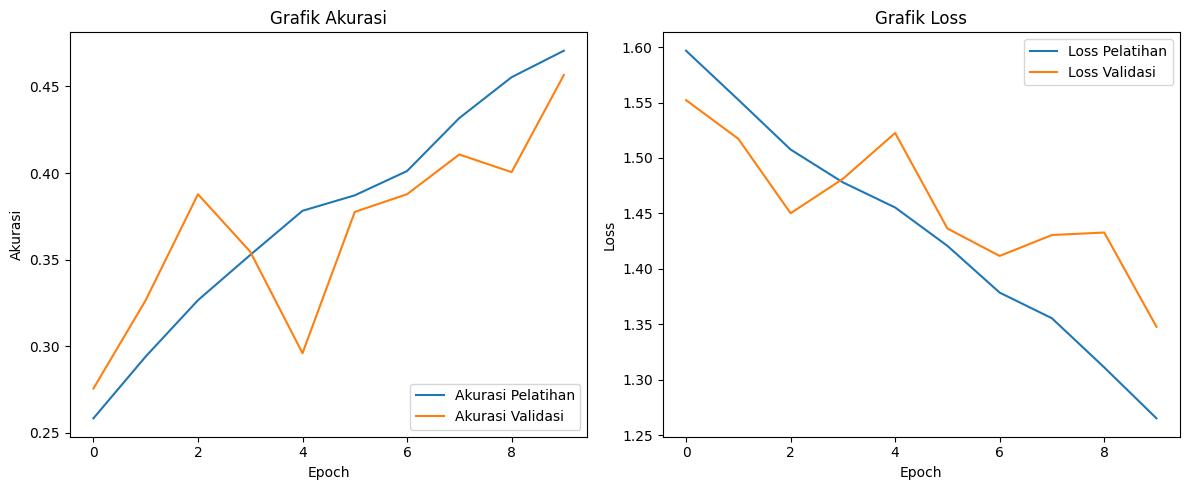

In [54]:
# Grafik Akurasi
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc='lower right')

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [55]:
model.save('D:/Bootcamp DS/Final Project DS/Case 4/earlystoping-Epoch.hdf5')

In [56]:
# Mengevaluasi model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


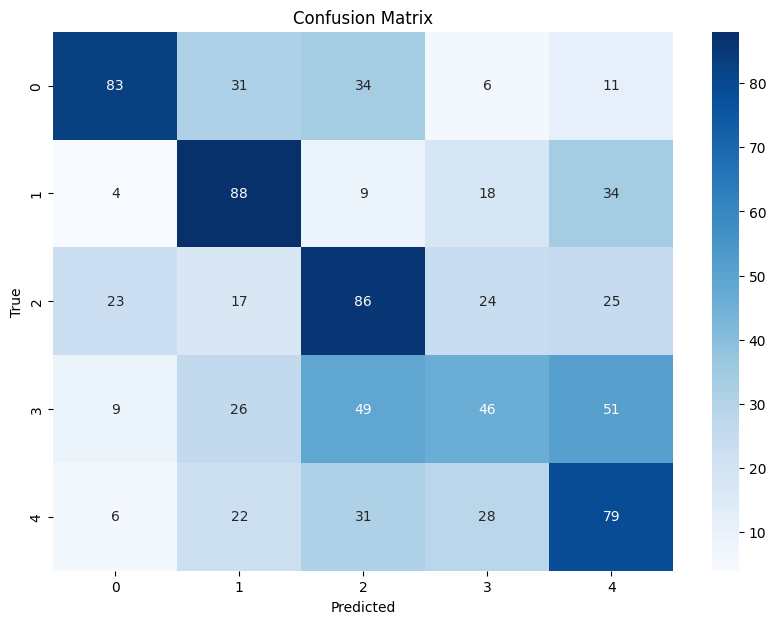

In [57]:
# Matriks kebingungan
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

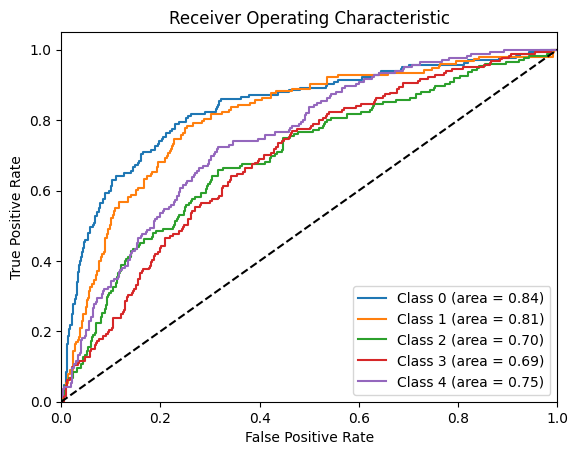

In [58]:
# Menghitung dan menampilkan ROC
fpr = {}
tpr = {}
roc_auc = {}
n_classes = 5

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()